<a href="https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/Modulo_2/Clases/0722/2_3_3_Exploracion_visual_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploración de datos

## Conjunto de datos de Diabetes

In [7]:
"""
En este cuaderno trabajaremos con el Diabetes Dataset de Sci-Kit Learn
https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
Y utilizaremos la librería Seaborn para la visualización de datos
https://seaborn.pydata.org/
"""

# Importamos liberías de visualización
import seaborn as sns
sns.set_style("whitegrid") # muestra la cuadrícula de posición en los gráficos
import matplotlib.pyplot as plt

# Importtamos librería de análisis y estructuración de datos 
from sklearn.datasets import load_diabetes
import pandas as pd
# Esta opción permite que se muestren
pd.set_option('display.max_columns', None) 


# todas las columnas en el dataset
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data = load_diabetes()
print("tipo de datos:", type(data))
print("columnas:", data.feature_names)
df = pd.DataFrame(data=data.data, columns=data.feature_names)

print(df.describe())
print("\n", 50 * "*", "\n Descripción del dataset: \n\n",data.DESCR)

tipo de datos: <class 'sklearn.utils.Bunch'>
columnas: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.639623e-16  1.309912e-16 -8.013951e-16  1.289818e-16 -9.042540e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   1.3011

In [8]:
# El método DESCR del dataset nos permite ampliar la información sobre el dataset de trabajo
# Vamos a renombrar las columnas siguiendo la nomenclatura de las variables clínicas
df = df.rename(columns={'s1': 'tc', 's2': 'ldl', 's3': 'hdl', 's4': 'tch', 's5': 'ltg', 's6': 'glu'})
print(df)
# Nota, como habrás observado, este dataset ha sido previamente normalizado 
# para facilitar la aplicación de ciertos modelos de aprendizaje automático

          age       sex       bmi        bp        tc       ldl       hdl  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

          tch       ltg       glu  
0   -0.002592  0.019908 -0.017646  
1  

## Gráfico de dispersión

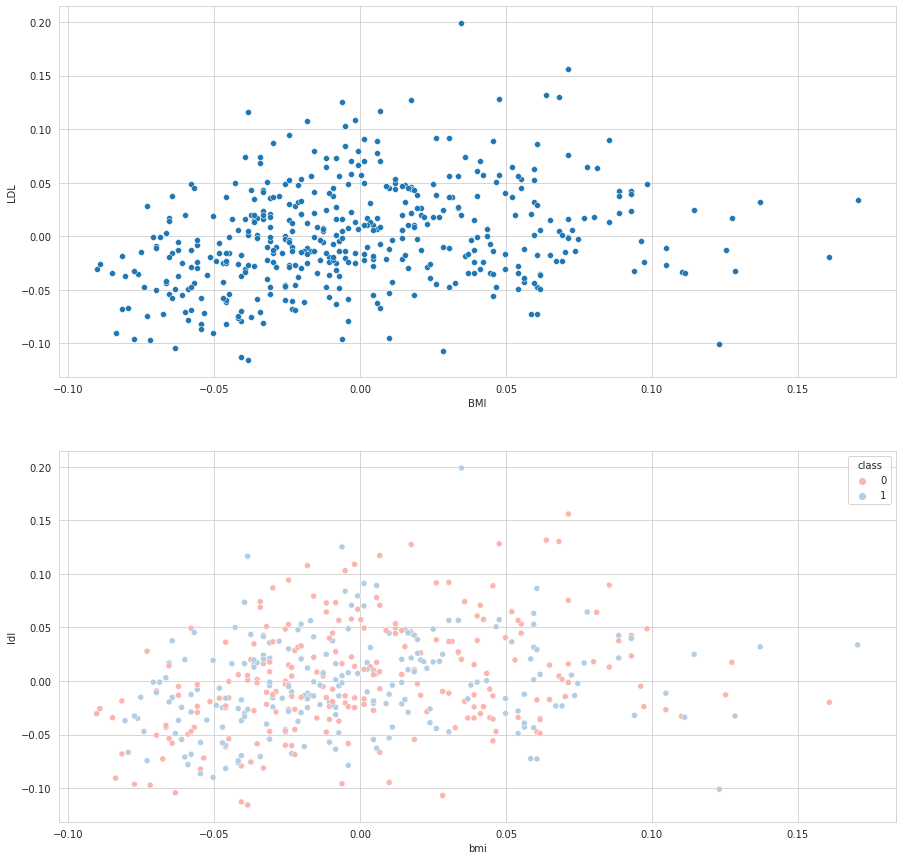

In [16]:
# Veámos la cómo se relacionan los niveles de LDL y el Índice de Masa Corporal (BMI)
fig = plt.figure(1, figsize=(15,15))
fig.add_subplot(211)
sns.scatterplot(data=data, x=df['bmi'], y=df['ldl'], palette='Pastel1', legend='full')
plt.xlabel('BMI')
plt.ylabel('LDL')

# Para evaluar la separación entre datos, necesitaríamos etiqueta categórica para 
# cada variable, hagamos una dummy
import numpy as np
class_l = np.random.randint(2, size=len(df['bmi'].values))
df_l = df
df_l['class'] = class_l
fig.add_subplot(212)
sns.scatterplot(data=df_l, x=df_l['bmi'], y=df_l['ldl'], palette='Pastel1', legend='full', hue='class')
# Como vemos, al haber utilizado una distribución aleatoria los datos aparecen mezclados

## Gráficos de cajas

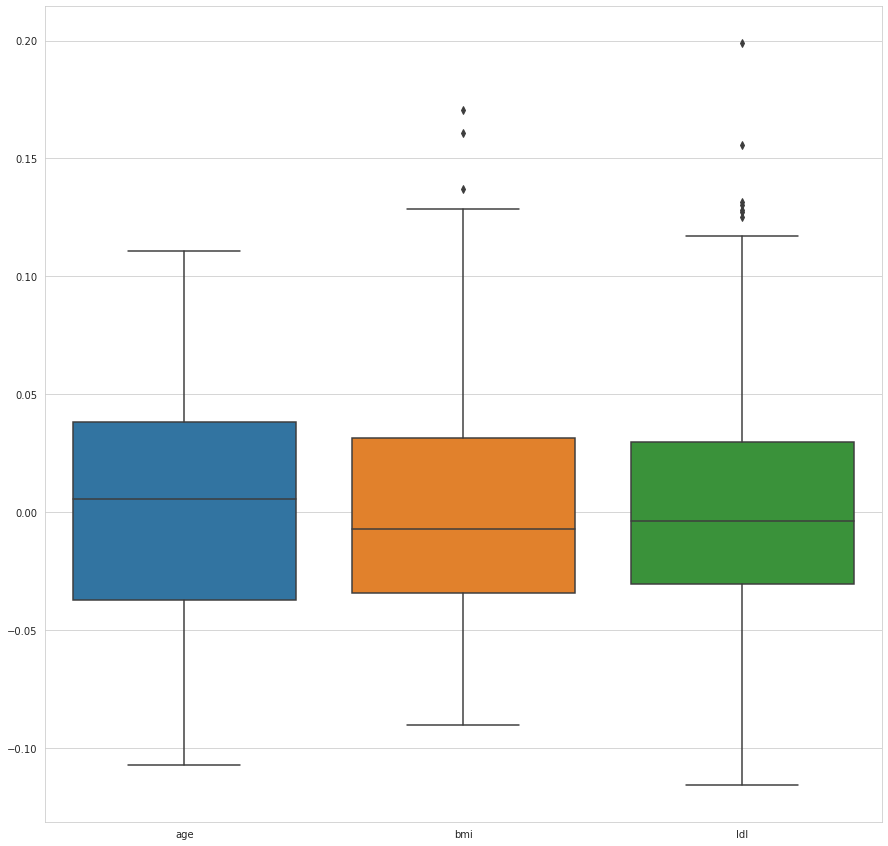

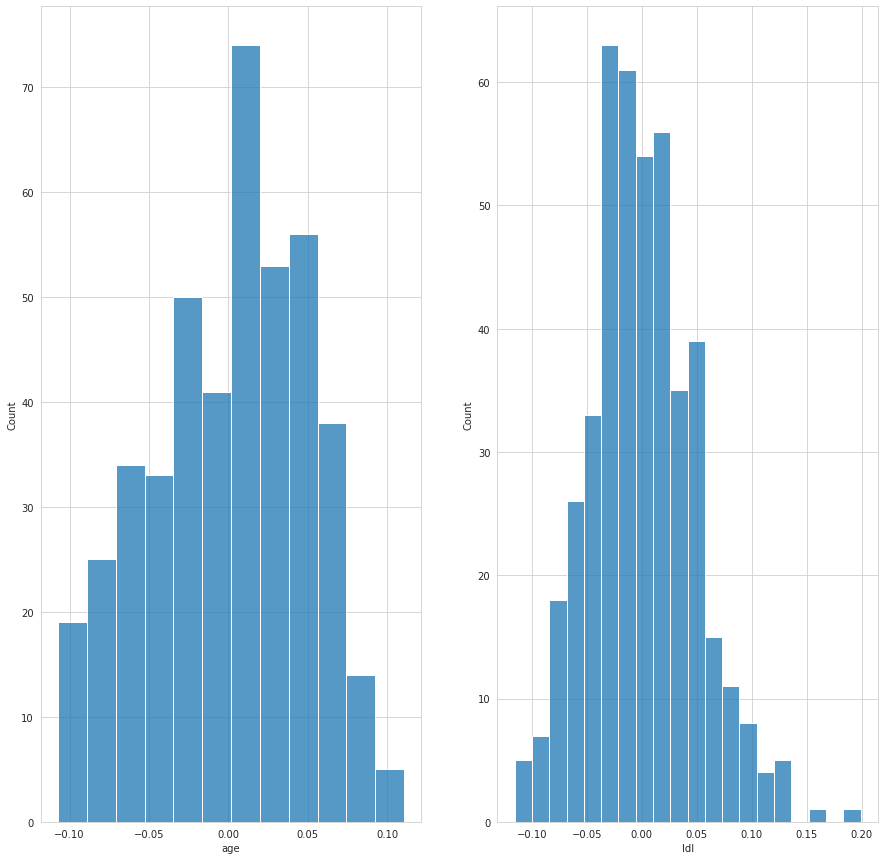

In [23]:
# Por legibilidad y para reducir el tiempo de ejecución 
# reducimos el dataset a las siguientes tres variables
fig = plt.figure(1, figsize=(15,15))
fig.add_subplot(111)

df_s = df[['age', 'bmi', 'ldl']]
sns.boxplot(data=df_s)

fig = plt.figure(2, figsize=(15,15))
fig.add_subplot(121)
sns.histplot(df['age'])
fig.add_subplot(122)
sns.histplot(df['ldl'])


## Gráficos de distribución

media (ldl): 1.3011211012575365e-16
desv (ldl): 0.04756514941544905


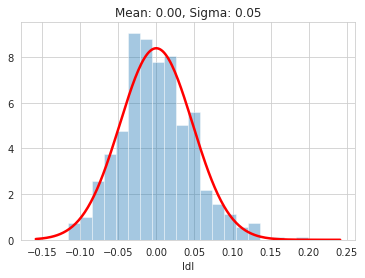

In [29]:
from scipy.stats import norm # Usamos la función normal de scipy stats para
# ajustar el histograma de la distribución
pars = norm.fit(df['ldl'].values)
sns.distplot(df['ldl'], kde=False, fit=norm, fit_kws={'color': 'r', 'linewidth': 2.5})
plt.title("Mean: {:.2f}, Sigma: {:.2f}".format(pars[0], pars[1]))

import numpy
print("media (ldl):", np.mean(df['ldl'].values))
print("desv (ldl):", np.std(df['ldl'].values))



## Gráficos de pares

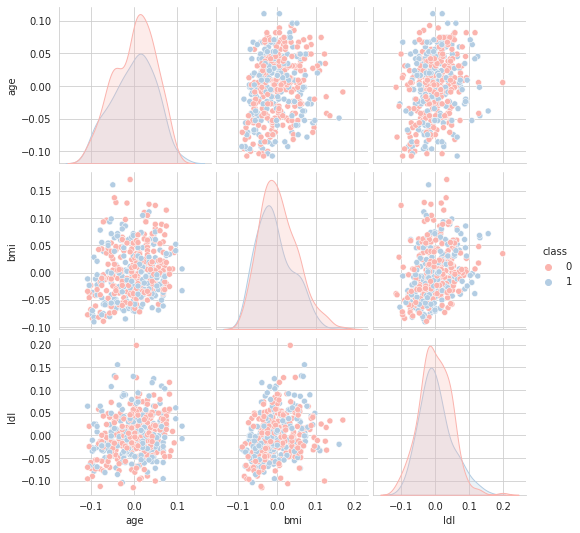

In [ ]:
df_l = df_l[['age', 'bmi', 'ldl', 'class']]
sns.pairplot(df_l, palette='Pastel1', hue='class')
plt.show()